In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import json

In [2]:
with open('Sarcasm_Headlines_Dataset_v2.json') as file:
    data = []
    for line in file:
        lines = json.loads(line)
        data.append(lines)

In [3]:
text = [i['headline'] for i in data]
label = [i['is_sarcastic'] for i in data]

In [4]:
x_train = text[:25000]
y_train = label[:25000]
x_test = text[25000:]
y_test = label[25000:]

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
sarcasm = Tokenizer(num_words=100,oov_token='OOV')

In [7]:
sarcasm.fit_on_texts(x_train)

In [8]:
sequences_train = sarcasm.texts_to_sequences(x_train)
sequences_test = sarcasm.texts_to_sequences(x_test)

In [9]:
padded_train = pad_sequences(sequences_train,maxlen=10,padding='post',truncating='post')
padded_test = pad_sequences(sequences_test,maxlen=10,padding='post',truncating='post')

In [10]:
x_train_array = np.array(padded_train)
y_train_array = np.array(y_train)
x_test_array = np.array(padded_test)
y_test_array = np.array(y_test)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100,32,input_length = 10),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [13]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs['loss'] < 0.5:
            model.stop_training = True
            print('\nThe model has reached the loss threshold, so stopping the train sequence')
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 0.01 * 10 ** (epoch/20))
calls = mycallback()

In [14]:
history = model.fit(x_train_array,y_train_array,validation_data=(x_test_array,y_test_array),epochs=5,callbacks=[lr_scheduler],batch_size=64,verbose=0)

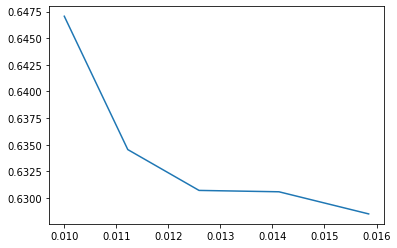

In [15]:
import matplotlib.pyplot as plt
lrs = 0.01 * (10 ** (np.arange(5)/20))
loss = history.history['loss']
plt.plot(lrs,loss)
plt.show()

In [16]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.016))
history = model.fit(x_train_array,y_train_array,validation_data=(x_test_array,y_test_array),epochs=25,callbacks=[calls],batch_size=64)

Epoch 1/25
391/391 [==============================] - 10s 13ms/step - loss: 0.6337 - val_loss: 0.5889
Epoch 2/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5799 - val_loss: 0.5287
Epoch 3/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5425 - val_loss: 0.5239
Epoch 4/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5339 - val_loss: 0.5206
Epoch 5/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5242 - val_loss: 0.5602
Epoch 6/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5171 - val_loss: 0.4968
Epoch 7/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5061 - val_loss: 0.5039
Epoch 8/25
391/391 [==============================] - 4s 10ms/step - loss: 0.5032 - val_loss: 0.4959
Epoch 9/25
391/391 [==============================] - 4s 10ms/step - loss: 0.4965 - val_loss: 0.5264
Epoch 10/25
391/391 [==============================] - 4s 11ms/step - loss: 0.5032 - val_l

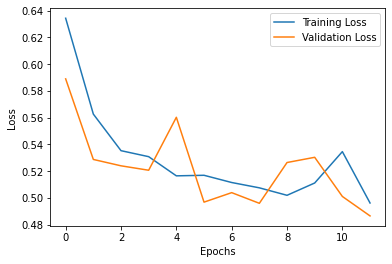

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

total_epochs = len(loss)
epochs = range(total_epochs)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()